In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance=pd.read_csv("/content/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.replace({'sex':{'female':0,'male':1}},inplace=True)
insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [7]:
insurance.region.value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

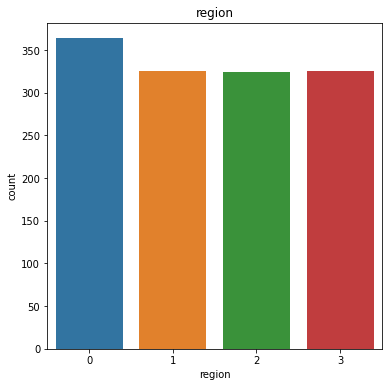

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('region')
plt.show()

In [10]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
model=LinearRegression()

In [13]:
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
trainPrediction=model.predict(X_train)

In [16]:
r2_train = metrics.r2_score(Y_train, trainPrediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [17]:
test_data_prediction =model.predict(X_test)

In [18]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [19]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3733.96341684]
The insurance cost is USD  3733.963416836934


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
